# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
# %pip install --upgrade plotly

# !!_Other Misc Installs

(So I don't have to do it later and restart)

In [1]:
# # To update Plotly above, but include so all at once
# %pip install --upgrade plotly

# # Needed to show charts
# %pip install nbformat


# # When charting with Seaborn/Plotly and want lowess true to produce trendline
# %pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.1 MB 1.3 MB/s eta 0:00:15
    --------------------------------------- 0.3/19.1 MB 3.1 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/19.1 MB 6.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.5/19.1 MB 12.4 MB/s eta 0:00:02
   -------- ------------------------------- 4.1/19.1 MB 16.3 MB/s eta 0:00:01
   ----------- ---------------------------- 5.4/19.1 MB 18.3 MB/s eta 0:00:01
   -------------- ------------------------- 6.8/19.1 MB 19.8 MB/s eta 0:00:01
   ----------------- ---------------------- 8.4/19.1 MB 22.3 MB/s eta 0:00:01
   -------------------- ------------------- 9.9/19.1 MB 24.5 MB/s eta 0:00:01
   ------------------------ --------------- 11.5/19.1 MB 36.4 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
df_yearly.shape

(12, 4)

In [10]:
df_yearly.sort_values(by=['year', 'clinic'], inplace=True)
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
6,1841,2442,86,clinic 2
1,1842,3287,518,clinic 1
7,1842,2659,202,clinic 2
2,1843,3060,274,clinic 1
8,1843,2739,164,clinic 2
3,1844,3157,260,clinic 1
9,1844,2956,68,clinic 2
4,1845,3492,241,clinic 1
10,1845,3241,66,clinic 2


In [11]:
df_monthly.shape

(98, 3)

In [12]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [13]:
df_monthly.sort_values(by='date', inplace=True)
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [14]:
df_monthly.births.mean()

np.float64(267.0)

In [15]:
df_monthly.deaths.mean()

np.float64(22.46938775510204)

### Check for Nan Values and Duplicates

In [19]:
print(f"Dupes? {df_monthly.duplicated().values.any()}")
print(f"NaN? {df_monthly.isna().values.any()}")

Dupes? False
NaN? False


In [20]:
print(f"Dupes? {df_yearly.duplicated().values.any()}")
print(f"NaN? {df_yearly.isna().values.any()}")

Dupes? False
NaN? False


### Descriptive Statistics

In [21]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


In [22]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [25]:
mort_rate = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f"Chances of dying: {mort_rate:.3}%")

Chances of dying: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

In [26]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

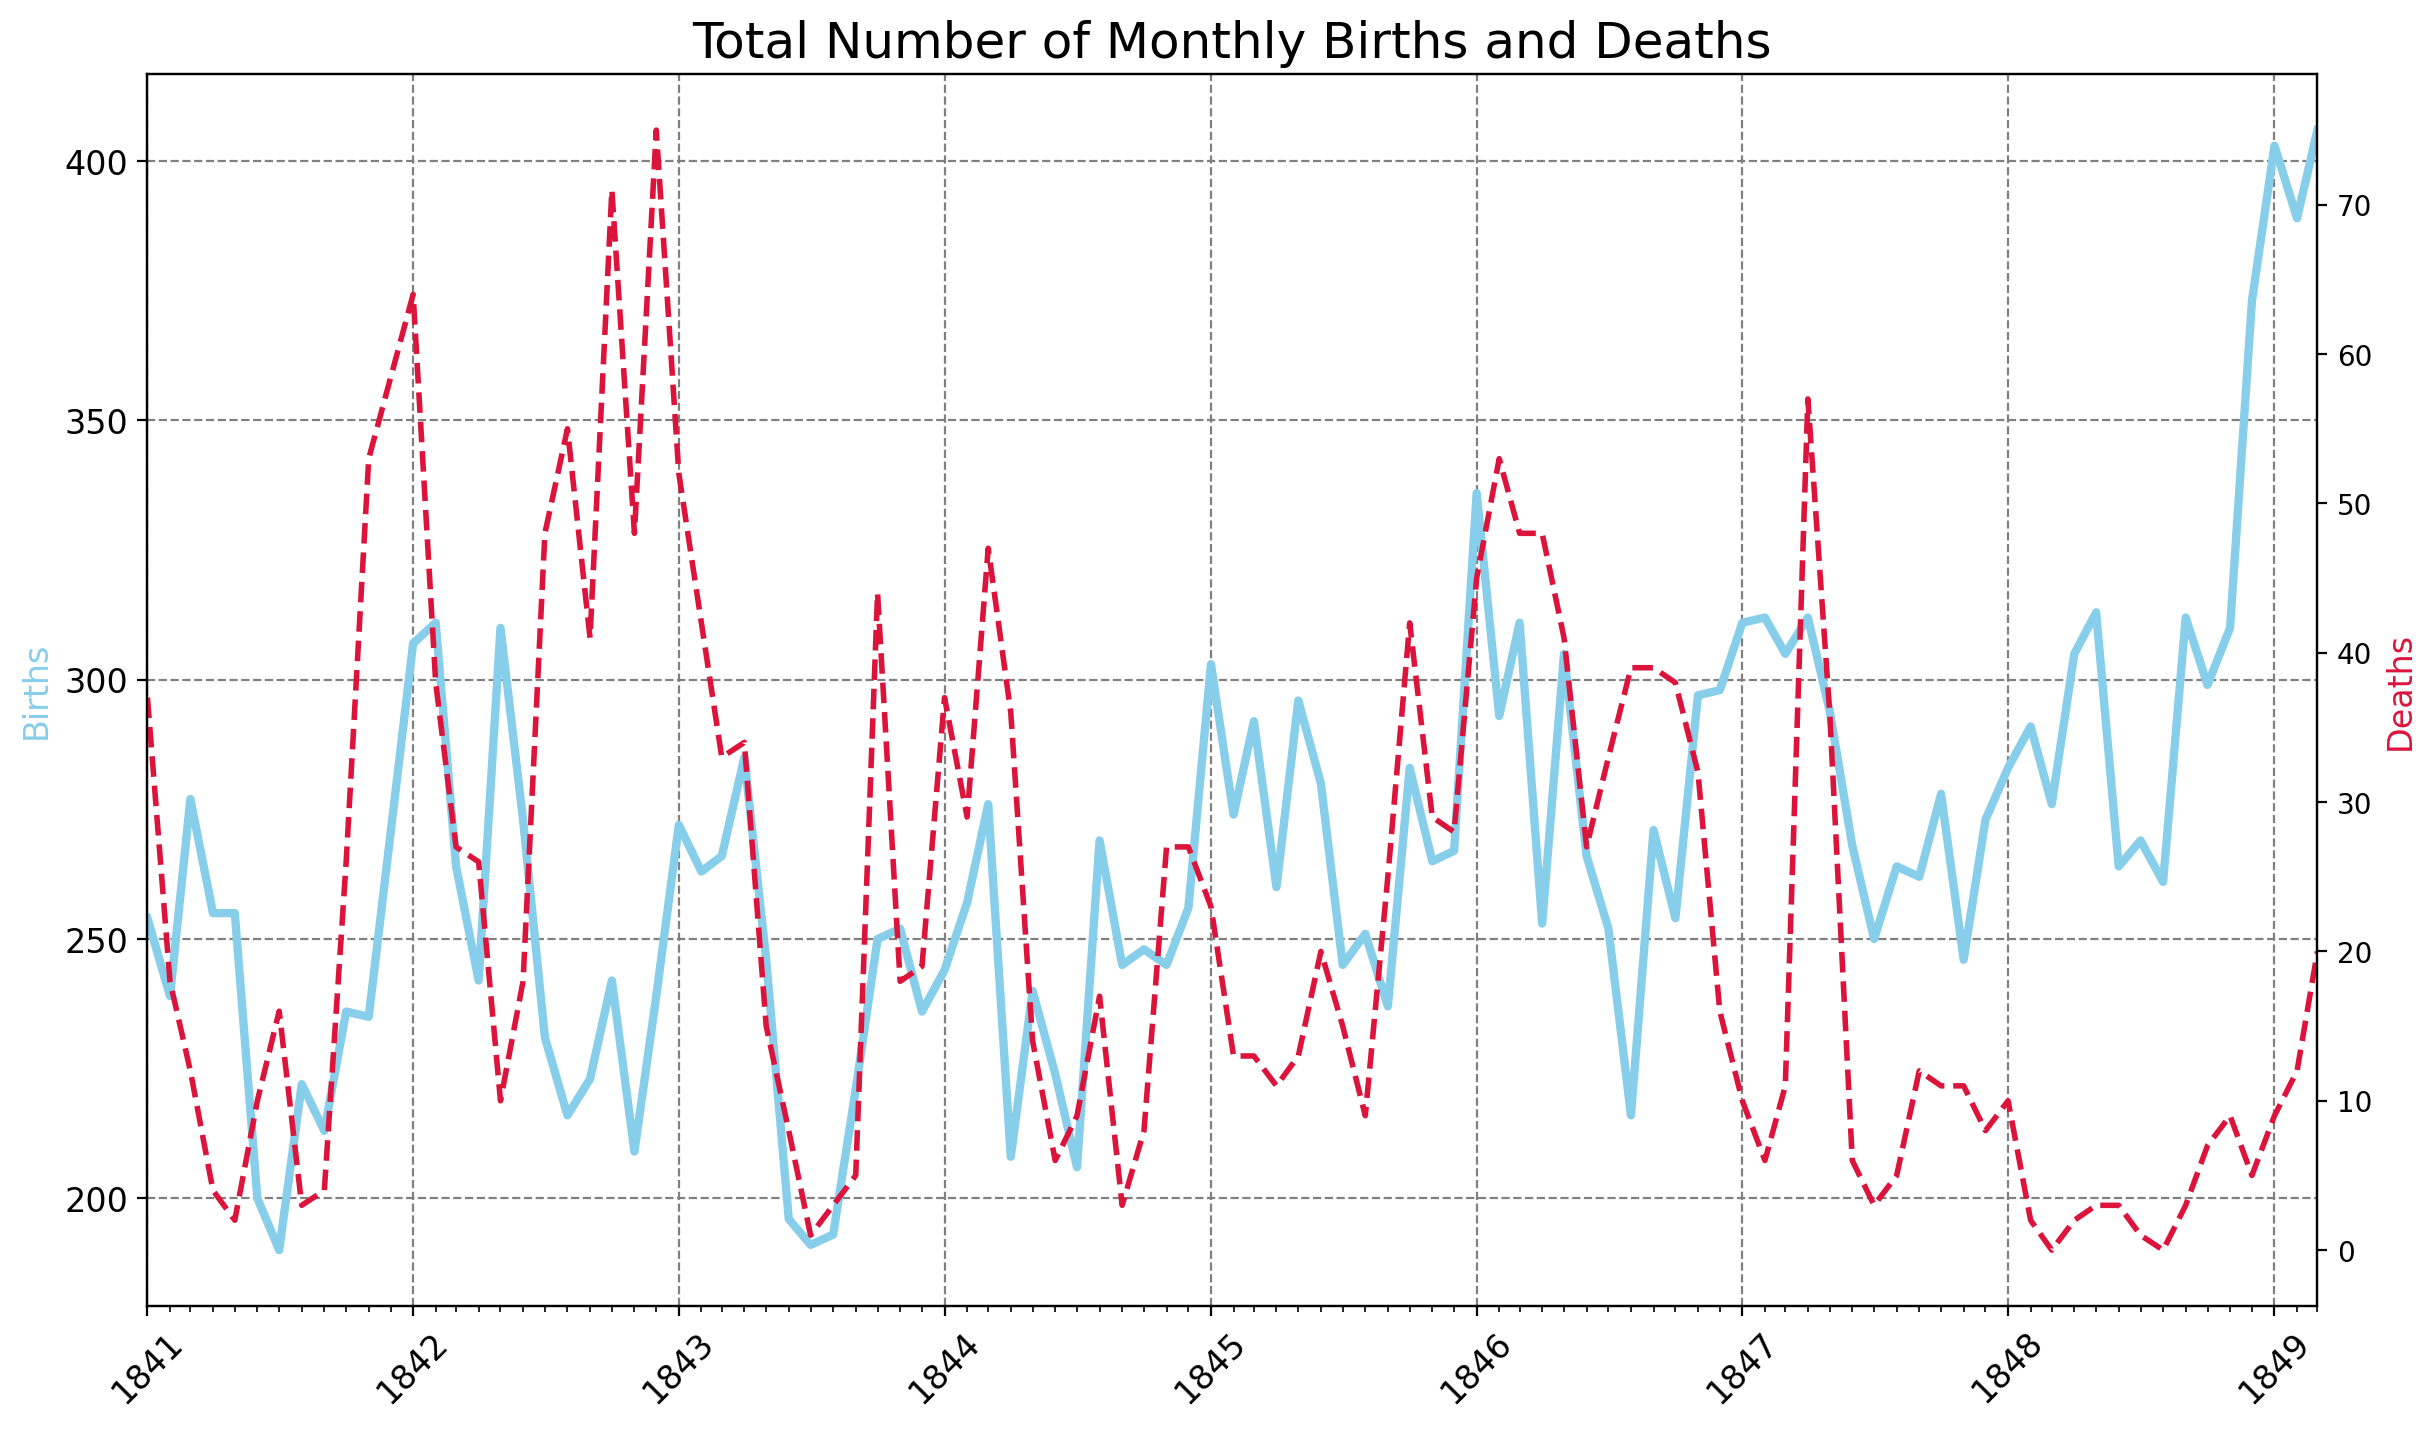

In [32]:
# Set figure size
plt.figure(figsize=(14,8), dpi=200)

# Add Title
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

# Set font size for ticks - add rotation
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Get current axes, then create another axis that share x
ax1 = plt.gca()
ax2 = ax1.twinx()

# Gridlines
ax1.grid(color='gray', linestyle='--')


# Add labels
ax1.set_ylabel('Births', color='skyblue', fontsize=12)
ax2.set_ylabel('Deaths', color='crimson', fontsize=12)

# Set x,y limits
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

# Plot both
ax1.plot(
    df_monthly.date,
    df_monthly.births,
    color='skyblue',
    linewidth=3
    )

ax2.plot(
    df_monthly.date,
    df_monthly.deaths,
    color='crimson',
    linewidth=2,
    linestyle='--'
)

# Setting major and minor ticks w date formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

There are two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.



In [38]:
clinic1 = df_yearly[df_yearly.clinic == 'clinic 1']
clinic2 = df_yearly[df_yearly.clinic == 'clinic 2']

In [40]:
line = px.line(
    df_yearly,
    x='year',
    y='births',
    color='clinic',
    title='Toal Yearly Births by Clinic'
)

line.show()


We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

We also see that, not only were more people born in clinic 1, more people also died in clinic 1.

In [41]:
line2 = px.line(
    df_yearly,
    x='year',
    y='deaths',
    color='clinic',
    title='Number of Yearly Deaths by Clinic'
)

line2.show()

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [42]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
6,1841,2442,86,clinic 2,0.04
1,1842,3287,518,clinic 1,0.16
7,1842,2659,202,clinic 2,0.08
2,1843,3060,274,clinic 1,0.09
8,1843,2739,164,clinic 2,0.06
3,1844,3157,260,clinic 1,0.08
9,1844,2956,68,clinic 2,0.02
4,1845,3492,241,clinic 1,0.07
10,1845,3241,66,clinic 2,0.02


In [44]:
avg_1 = clinic1.deaths.sum() / clinic1.births.sum() * 100
print(f"Average death rate for Clinic 1: {avg_1:.3}%")

Average death rate for Clinic 1: 9.92%


In [45]:
avg_2 = clinic2.deaths.sum() / clinic2.births.sum() * 100
print(f"Average death rate for Clinic 2: {avg_2:.3}%")

Average death rate for Clinic 2: 3.88%


### Plotting the Proportion of Yearly Deaths by Clinic

In [43]:
line3 = px.line(
    df_yearly,
    x='year',
    y='pct_deaths',
    color='clinic',
    title='Mortality Percent by Clinic'
)

line3.show()

The story continues...

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [46]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [47]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [48]:
before = df_monthly[df_monthly.date < handwashing_start]
before

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [50]:
after = df_monthly[df_monthly.date >= handwashing_start]
after

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


In [51]:
before_avg = before.deaths.sum() / before.births.sum() * 100
after_avg = after.deaths.sum() / after.births.sum() * 100

print(f"Avg Death Rate Before Handwashing: {before_avg:.3}%")
print(f"Avg Death Rate After Handwashing: {after_avg:.3}%")

Avg Death Rate Before Handwashing: 10.5%
Avg Death Rate After Handwashing: 2.15%


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [53]:
before_roll = before.set_index('date')
before_roll = before_roll.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

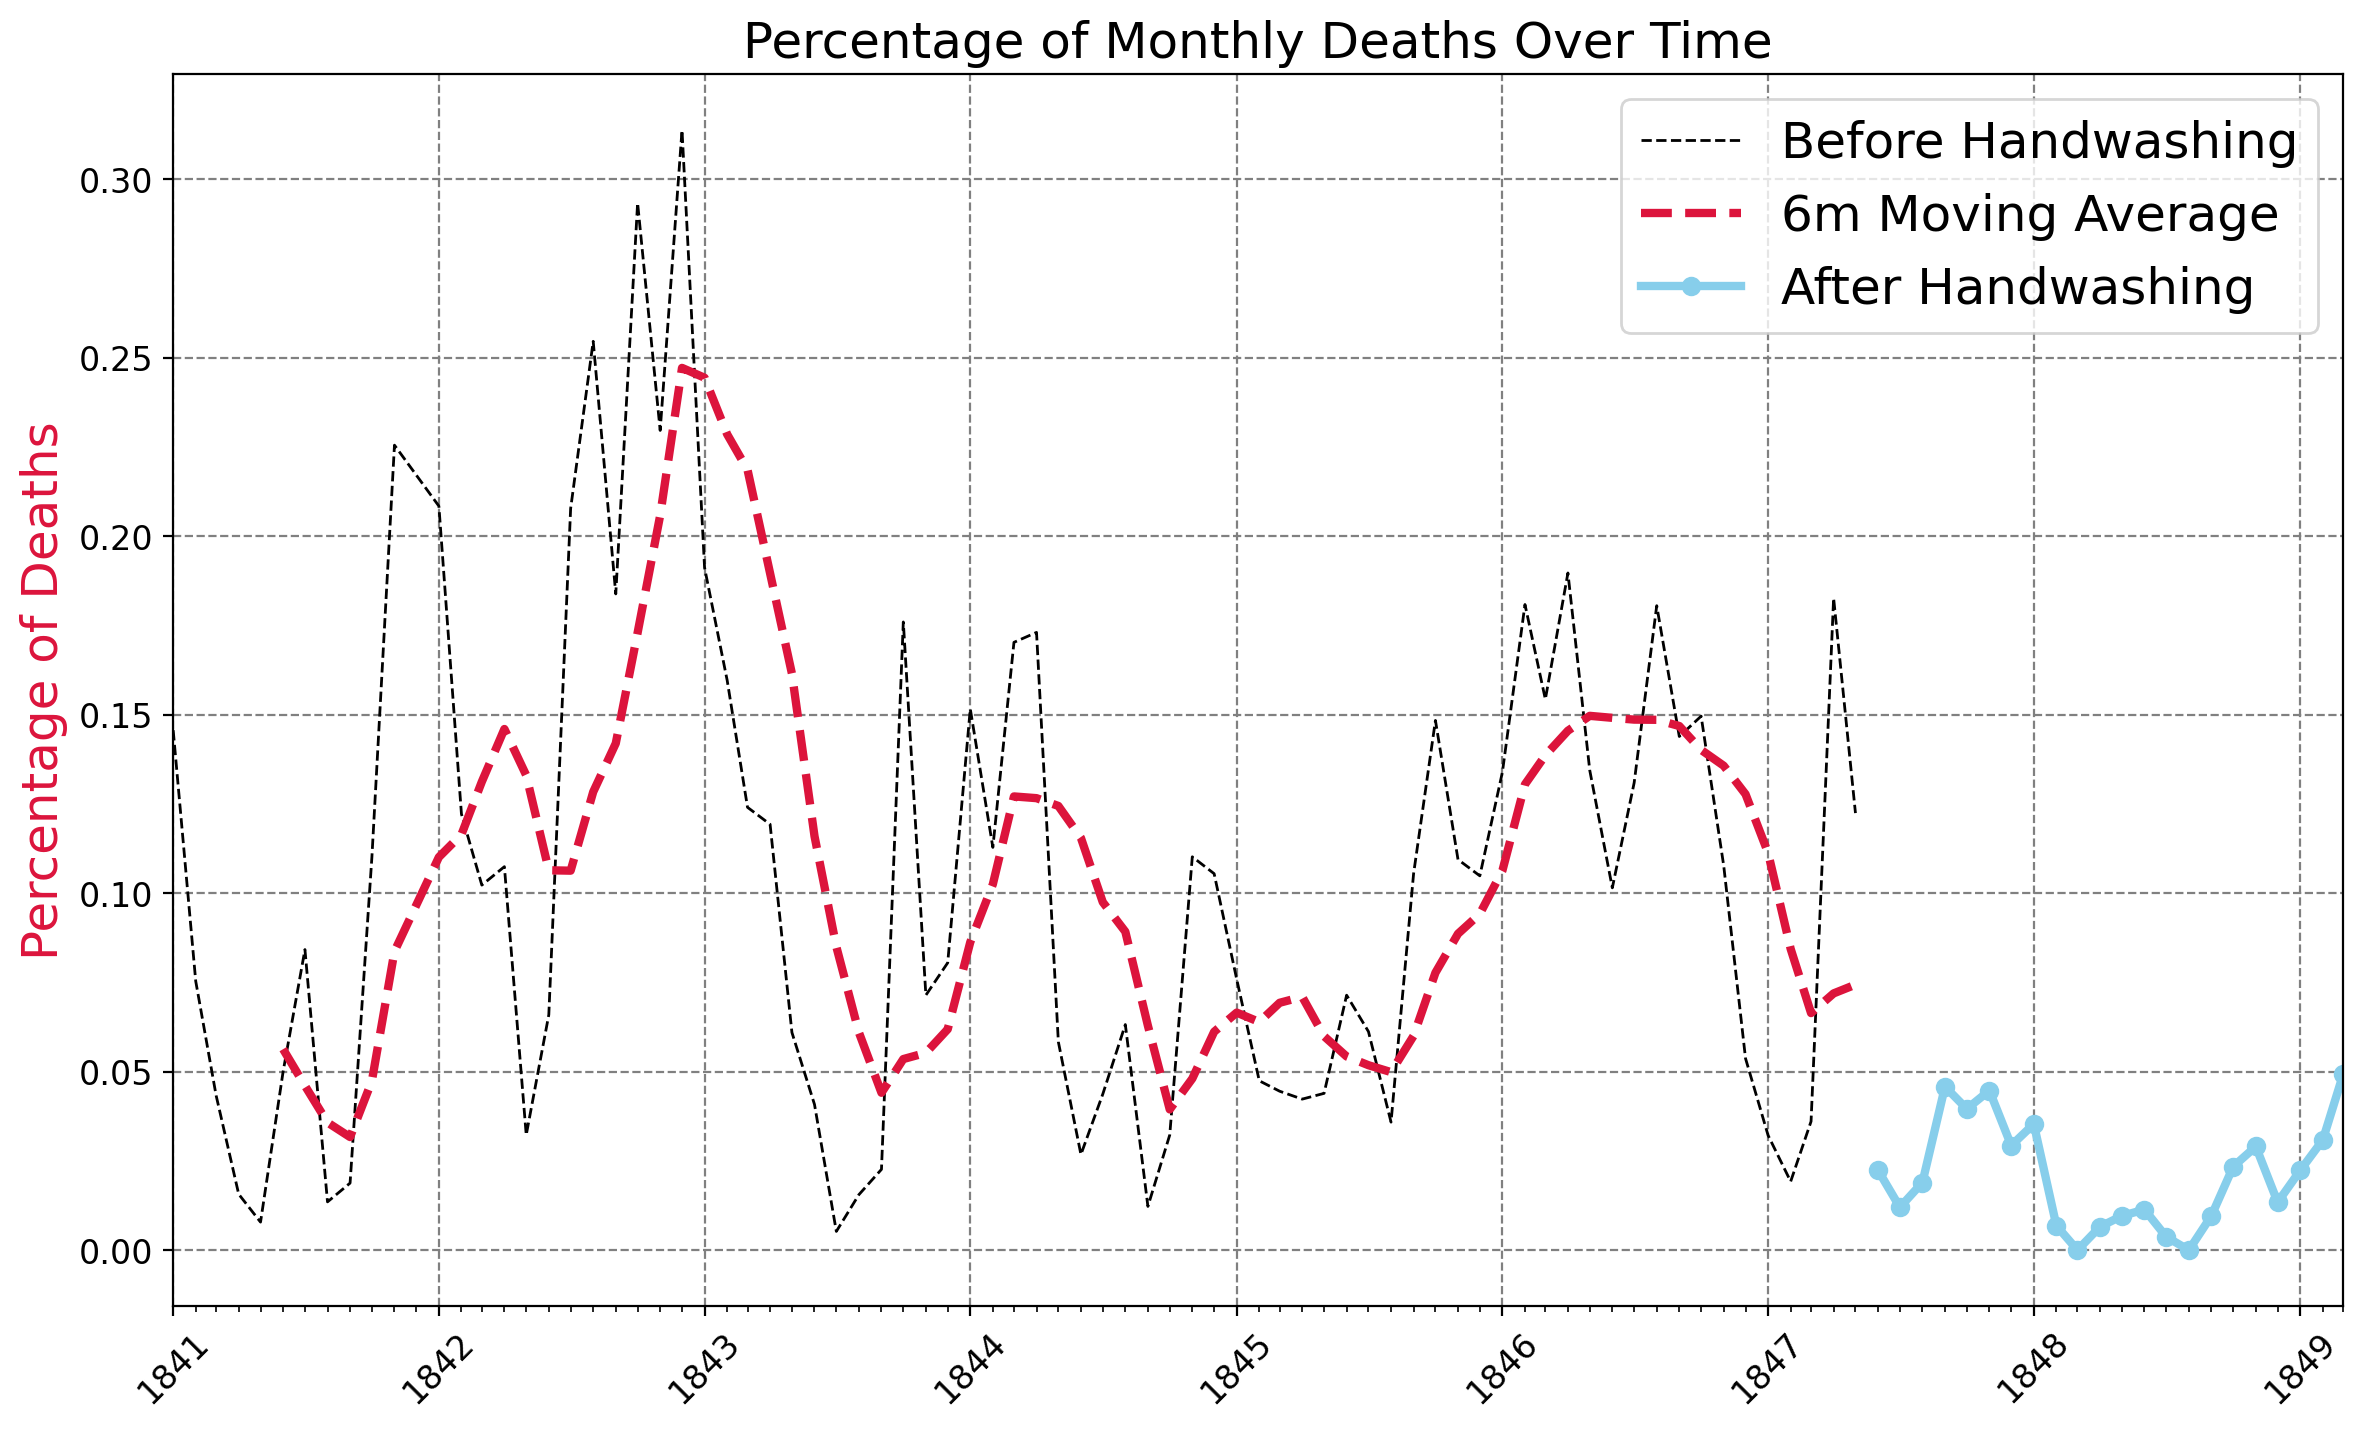

In [56]:
# Set figure size
plt.figure(figsize=(14,8), dpi=200)

# Add Title
plt.title('Percentage of Monthly Deaths Over Time', fontsize=18)


# Set font size for ticks - add rotation
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add Label
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)


# Est axis
ax = plt.gca()

# Setting major and minor ticks w date formatter
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

# Gridlines
plt.grid(color='gray', linestyle='--')


# Plot each
# Before Handwashing - Death Percentage
before_line, = plt.plot(
    before.date,
    before.pct_deaths,
    color='black',
    linewidth=1,
    linestyle='--',
    label='Before Handwashing'
    )

# Moving Average
moving_line, = plt.plot(
    before_roll.index,
    before_roll.pct_deaths,
    color='crimson',
    linewidth=3,
    linestyle='--',
    label='6m Moving Average'
)

# After Handwashing - Death Percentage
after_line, = plt.plot(
    after.date,
    after.pct_deaths,
    color='skyblue',
    linewidth=3,
    marker='o',
    label='After Handwashing'
)

# Include Legend (Need commas in names above for this to pass as list)
plt.legend(handles=[before_line, moving_line, after_line], fontsize=18)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [57]:
before

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [59]:
print(f"Chance of Death Before Handwashing: {before_avg:.3}%")
print(f"Chance of Death After Handwashing: {after_avg:.3}%")
reduced = before_avg - after_avg
print(f"Handwashing Reduced monthly proportion of deaths by: {reduced:.3}%")
times = before_avg / after_avg
print(f"This is a {times:.2}x improvement!")

Chance of Death Before Handwashing: 10.5%
Chance of Death After Handwashing: 2.15%
Handwashing Reduced monthly proportion of deaths by: 8.37%
This is a 4.9x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [60]:
df_monthly['when'] = np.where(df_monthly.date < handwashing_start, 'before', 'after')
df_monthly

,date,births,deaths,pct_deaths,when
0,1841-01-01,254,37,0.15,before
1,1841-02-01,239,18,0.08,before
2,1841-03-01,277,12,0.04,before
3,1841-04-01,255,4,0.02,before
4,1841-05-01,255,2,0.01,before
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,after
94,1848-12-01,373,5,0.01,after
95,1849-01-01,403,9,0.02,after
96,1849-02-01,389,12,0.03,after


In [61]:
box = px.box(
    df_monthly,
    x='when',
    y='pct_deaths',
    color='when',
    title='How Have the Stats Changed w Handwashing?'
)

box.update_layout(
    xaxis_title='Before or After Handwashing Required?',
    yaxis_title='Percentage of Monthly Deaths'
)

box.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [66]:
hist = px.histogram(
    df_monthly,
    x='pct_deaths',
    color='when',
    nbins=30,
    opacity=0.6,
    barmode='overlay',
    marginal='box',
    histnorm='percent'
)

hist.update_layout(
    xaxis_title='Proportion of Monthly Deaths',
    yaxis_title='Count'
)

hist.show()

Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


To create two bell-shaped curves of the estimated distributions of the death rates we just call .kdeplot() twice.

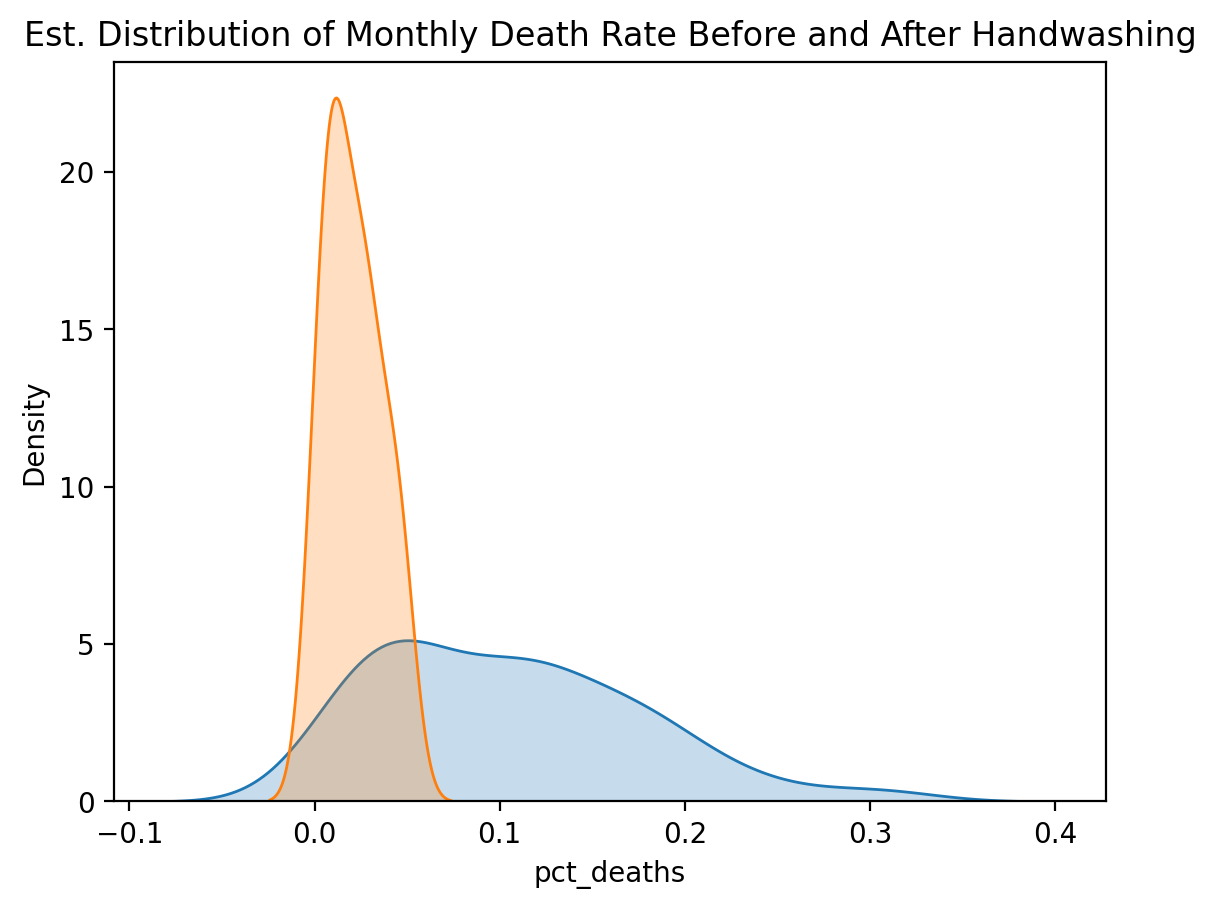

In [69]:
plt.figure(dpi=200)

# By default the distribution estimate includes a negative death rate
sns.kdeplot(
    before.pct_deaths,
    fill=True
)

sns.kdeplot(
    after.pct_deaths,
    fill=True
)

plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')

plt.show()

However, the problem is that we end up with a negative monthly death rate on the left tail. The doctors would be very surprised indeed if a corpse came back to life after an autopsy! 🧟‍♀️

The solution is to specify a lower bound of 0 for the death rate.

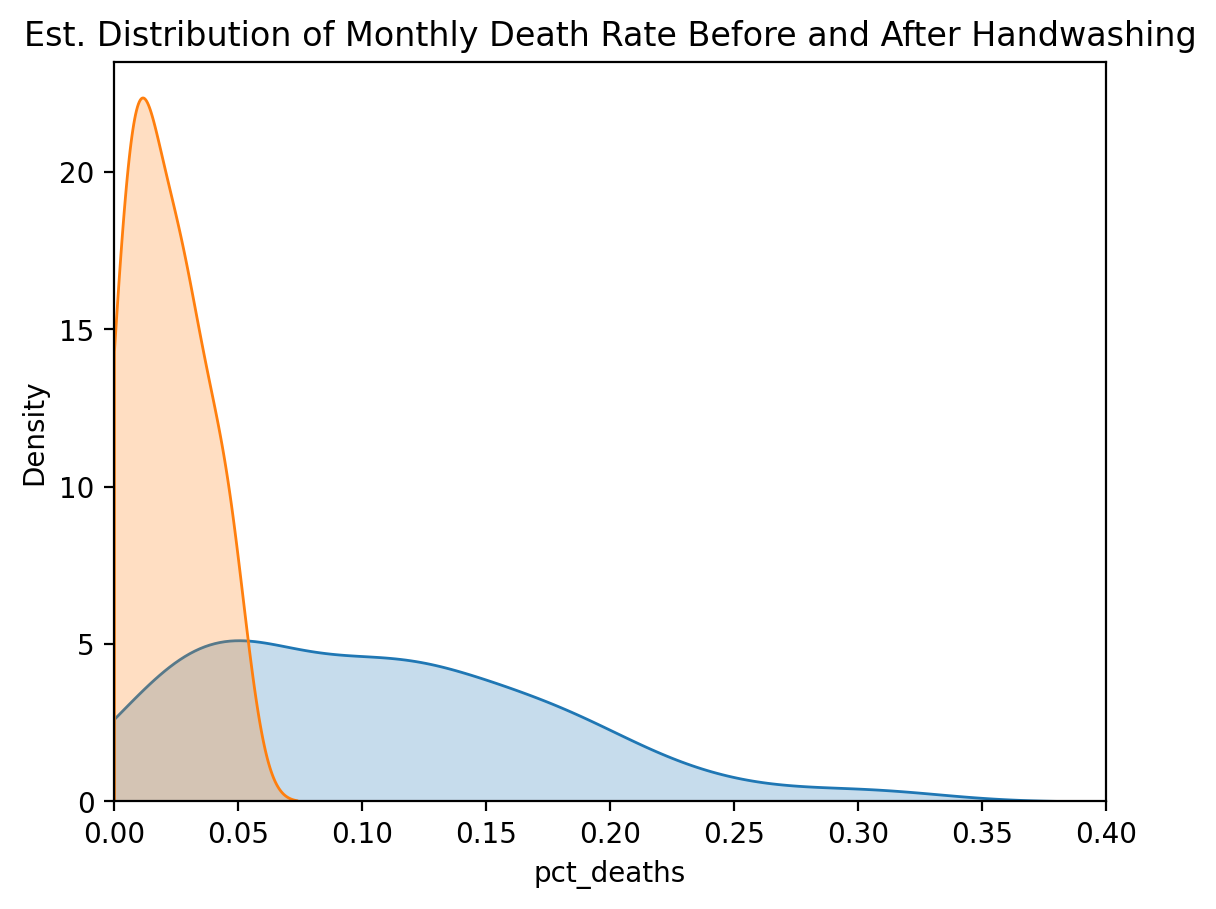

In [70]:
plt.figure(dpi=200)

# By default the distribution estimate includes a negative death rate
sns.kdeplot(
    before.pct_deaths,
    fill=True,
    clip=(0,1)
)

sns.kdeplot(
    after.pct_deaths,
    fill=True,
    clip=(0,1)
)

plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')

plt.xlim(0, 0.40)

plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>